### Building a Machine Learning and Deep Learning Models on Lympography data


This analysis aims to observe which features are most helpful in prediction and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to enhance lymphatic diseases diagnosis. To achieve this i have used machine learning and Deep learning classification methods to fit a function that can predict the discrete class of new input.

Load the Dataset

Importing ML and DL libraries

In [56]:
#importing the libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style('grid')
#sns.set_context("poster")
## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

In [57]:
#!pip install sklearn
#!pip install -U imbalanced-learn
## ML Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## To visualize decision tree ##
#from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus

In [58]:
#setting funtion to display maximum columns, rows and columns width of the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

The data file "lymphography.data" does not have column headers. To add headers, let's list the column names then specify this list when loading the data.

In [59]:
### List columns names based on the description
column_names=['class_levels','lymphatics','block_of_affere','block_of_lymph_c','block_of_lymp_s','bypass','extravasates','regeneration_of','earlyup_takein',
              'lymnodes_dimin','lymnodesenler','changes_in_lym','defect_in_node','changea_in_node','changes_in_stru','special_forms','dislocation_of','exclusion_no','num_of_nodes_in']
print('the number of features and target variable in our dataset :',len(column_names))

the number of features and target variable in our dataset : 19


Data can be in any form:

Types of data:

-Structured data:nominal/categorical,numerical,ordinal,time-series

-Unstructured data

In our case, we are considering Structured data i.e, tabular data

In [61]:
#loading the dataset
data_Frame = pd.read_csv('C:\\Users\\Dell\\Desktop\\Lymphography Dataset\\data\\lymphography.csv',header=None,names=column_names)
df=data_Frame.copy()
df.head()

,class_levels,lymphatics,block_of_affere,block_of_lymph_c,block_of_lymp_s,bypass,extravasates,regeneration_of,earlyup_takein,lymnodes_dimin,lymnodesenler,changes_in_lym,defect_in_node,changea_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_no,num_of_nodes_in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [62]:
#column names
df.columns

Index(['class_levels', 'lymphatics', 'block_of_affere', 'block_of_lymph_c',
       'block_of_lymp_s', 'bypass', 'extravasates', 'regeneration_of',
       'earlyup_takein', 'lymnodes_dimin', 'lymnodesenler', 'changes_in_lym',
       'defect_in_node', 'changea_in_node', 'changes_in_stru', 'special_forms',
       'dislocation_of', 'exclusion_no', 'num_of_nodes_in'],
      dtype='object')

In [63]:
#shape of the dataset
print('shape of the dataset in rows and columns: ',df.shape)
print('size of the dataset in rows * columns: ',df.size)

shape of the dataset in rows and columns:  (148, 19)
size of the dataset in rows * columns:  2812


Data Preparation steps to consider for the data analysis

-Renaming the columns

-Univariate analysis

-Finding data types of columns

-Missing values treatment

-dropping the duplicate rows

-bivariate analysis

-dropping irrelevant columns

-variable transformation

-dropping the missing or null values

-multivariate analysis

-detecting outliers

-feature creation

In [64]:
#Checking whether there is missing data or not, if not then it can proceed with the Exploratory Data Analysis (EDA) stage.
df.isnull().sum()

class_levels        0
lymphatics          0
block_of_affere     0
block_of_lymph_c    0
block_of_lymp_s     0
bypass              0
extravasates        0
regeneration_of     0
earlyup_takein      0
lymnodes_dimin      0
lymnodesenler       0
changes_in_lym      0
defect_in_node      0
changea_in_node     0
changes_in_stru     0
special_forms       0
dislocation_of      0
exclusion_no        0
num_of_nodes_in     0
dtype: int64

In [65]:
df.isnull().mean()

class_levels        0.0
lymphatics          0.0
block_of_affere     0.0
block_of_lymph_c    0.0
block_of_lymp_s     0.0
bypass              0.0
extravasates        0.0
regeneration_of     0.0
earlyup_takein      0.0
lymnodes_dimin      0.0
lymnodesenler       0.0
changes_in_lym      0.0
defect_in_node      0.0
changea_in_node     0.0
changes_in_stru     0.0
special_forms       0.0
dislocation_of      0.0
exclusion_no        0.0
num_of_nodes_in     0.0
dtype: float64

In [66]:
#type of the dataset
print('lymphography data type is:',type(df))

lymphography data type is: <class 'pandas.core.frame.DataFrame'>


array([[<AxesSubplot:title={'center':'lymphatics'}>,
        <AxesSubplot:title={'center':'block_of_affere'}>,
        <AxesSubplot:title={'center':'block_of_lymph_c'}>,
        <AxesSubplot:title={'center':'block_of_lymp_s'}>],
       [<AxesSubplot:title={'center':'bypass'}>,
        <AxesSubplot:title={'center':'extravasates'}>,
        <AxesSubplot:title={'center':'regeneration_of'}>,
        <AxesSubplot:title={'center':'earlyup_takein'}>],
       [<AxesSubplot:title={'center':'lymnodes_dimin'}>,
        <AxesSubplot:title={'center':'lymnodesenler'}>,
        <AxesSubplot:title={'center':'changes_in_lym'}>,
        <AxesSubplot:title={'center':'defect_in_node'}>],
       [<AxesSubplot:title={'center':'changea_in_node'}>,
        <AxesSubplot:title={'center':'changes_in_stru'}>,
        <AxesSubplot:title={'center':'special_forms'}>,
        <AxesSubplot:title={'center':'dislocation_of'}>],
       [<AxesSubplot:title={'center':'exclusion_no'}>,
        <AxesSubplot:title={'center':'

<Figure size 1800x1800 with 0 Axes>

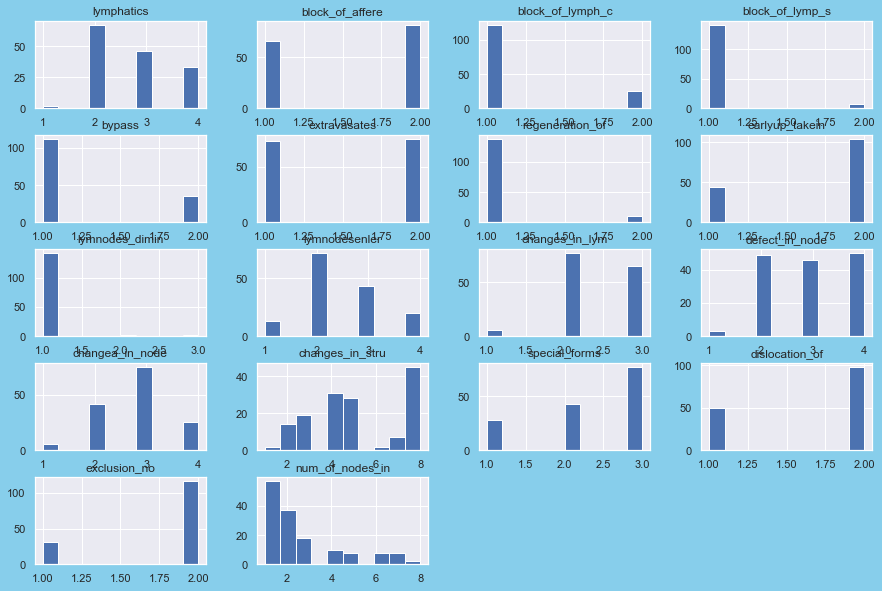

In [67]:
#target variable :class_levels
plt.figure(figsize=(25,25))
sns.set(rc={'figure.facecolor':'skyblue'})
df.drop(columns=['class_levels'],axis=1).hist(figsize=(15,10))

In [68]:
#knowing the relationship between the variables
df.corr(method='pearson')

,class_levels,lymphatics,block_of_affere,block_of_lymph_c,block_of_lymp_s,bypass,extravasates,regeneration_of,earlyup_takein,lymnodes_dimin,lymnodesenler,changes_in_lym,defect_in_node,changea_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_no,num_of_nodes_in
class_levels,1.000000,0.147550,-0.358447,-0.054812,0.212651,0.046761,0.118952,0.397742,0.255697,0.411953,0.258756,-0.181180,0.126130,0.033030,0.291371,0.377557,0.215118,0.232622,0.544329
lymphatics,0.147550,1.000000,0.084322,0.058310,0.109285,0.217326,0.136961,0.084832,0.085327,0.087863,0.208602,0.119311,0.150614,0.202660,-0.079649,0.102592,0.230786,0.082347,0.121657
block_of_affere,-0.358447,0.084322,1.000000,0.414163,0.199896,0.350223,0.338391,0.024882,0.011253,-0.086410,0.019828,0.295450,0.106347,0.198146,-0.067398,0.014942,-0.037284,0.039273,-0.088141
block_of_lymph_c,-0.054812,0.058310,0.414163,1.000000,0.482650,0.565957,0.348904,0.300160,0.028347,0.080621,0.057554,0.051258,0.100094,0.119139,0.068744,0.008984,0.104504,0.150359,0.199805
block_of_lymp_s,0.212651,0.109285,0.199896,0.482650,1.000000,0.393004,0.219822,0.447273,0.005647,0.262217,0.064485,0.011771,0.119046,0.099426,0.139536,0.069145,0.159152,0.114690,0.398857
bypass,0.046761,0.217326,0.350223,0.565957,0.393004,1.000000,0.433337,0.412066,0.024212,0.242446,0.056153,0.101449,0.204120,0.084089,-0.049369,0.103318,0.171884,0.137024,0.293236
extravasates,0.118952,0.136961,0.338391,0.348904,0.219822,0.433337,1.000000,0.157891,0.038359,0.105490,0.186838,0.193305,0.195745,0.065788,-0.076293,0.194895,0.095376,0.189623,0.234184
regeneration_of,0.397742,0.084832,0.024882,0.300160,0.447273,0.412066,0.157891,1.000000,-0.060487,0.550613,0.008726,-0.189464,0.072724,-0.001437,0.047740,0.128225,0.021535,0.072411,0.425165
earlyup_takein,0.255697,0.085327,0.011253,0.028347,0.005647,0.024212,0.038359,-0.060487,1.000000,-0.157259,0.422155,0.170705,0.008772,0.163128,0.126469,0.316225,0.254264,0.210115,0.291669
lymnodes_dimin,0.411953,0.087863,-0.086410,0.080621,0.262217,0.242446,0.105490,0.550613,-0.157259,1.000000,-0.317841,-0.327835,-0.017389,-0.263035,0.090464,0.000566,-0.089577,-0.006103,0.257242


<AxesSubplot:>

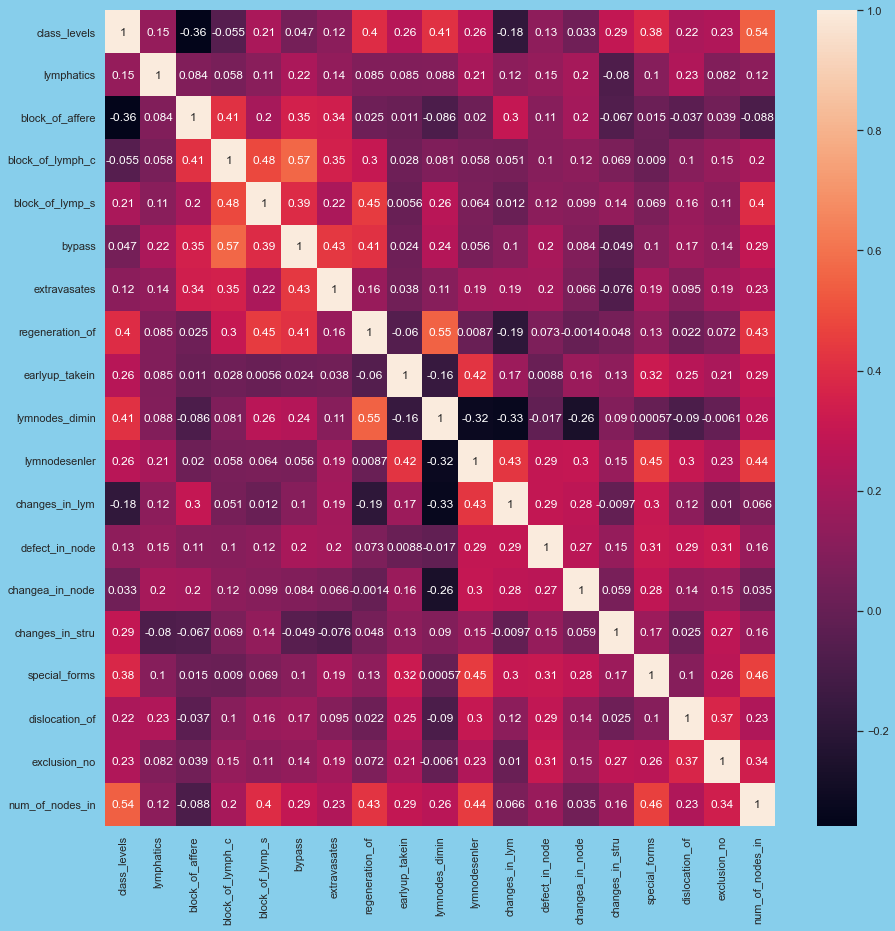

In [69]:
#heatmap shows the correlation between the various variables of the data
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

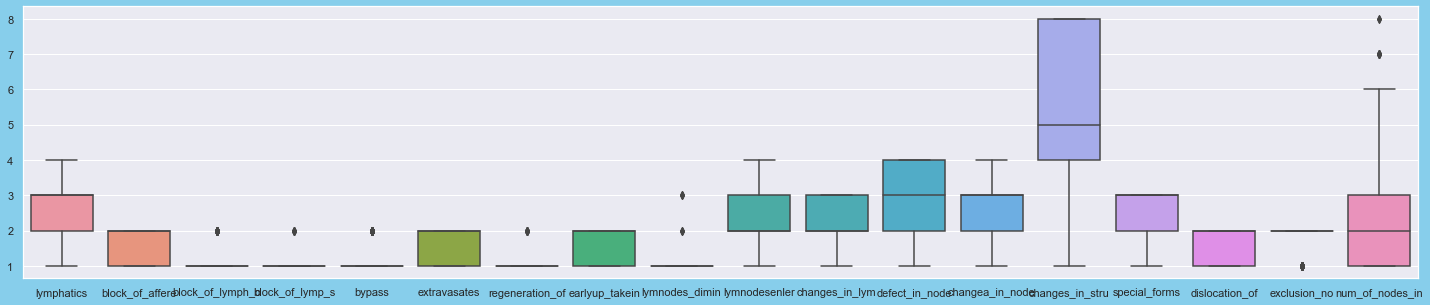

In [70]:
#identifying the outliers in our dataset
plt.figure(figsize=(25,5))
sns.boxplot(data=df.drop(columns=['class_levels'],axis=1))

# for i in df.columns:
#     sns.boxplot(data=df[i])
#     plt.show()

In [71]:
#Exploring the Dataset
df.describe(include='all')

,class_levels,lymphatics,block_of_affere,block_of_lymph_c,block_of_lymp_s,bypass,extravasates,regeneration_of,earlyup_takein,lymnodes_dimin,lymnodesenler,changes_in_lym,defect_in_node,changea_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_no,num_of_nodes_in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


By observing the count in the describe table above, luckily, there is no missing data.

Also, the min and max values each of the column corresponds to the dataset description posted so we can assume assume that we properly added the column names.

Now, let's look how balanced or imbalanced the classes (target variable) in our dataset.

In [72]:
#analysis the class of target variable
df.iloc[:,1].value_counts()

2    67
3    46
4    33
1     2
Name: lymphatics, dtype: int64

Majority of the classes 2 (metastases) and 3 (malign lymph) dominate the dataset. While the classes 4 (fibrosis) and 1 (normal find) are really under-represented.

Because of this, we will create and compare models trained using the upsampled data and the regular (not upsampled) data.

In [73]:
df.iloc[:,1].describe()

count    148.000000
mean       2.743243
std        0.817509
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: lymphatics, dtype: float64

<AxesSubplot:xlabel='lymphatics', ylabel='Count'>

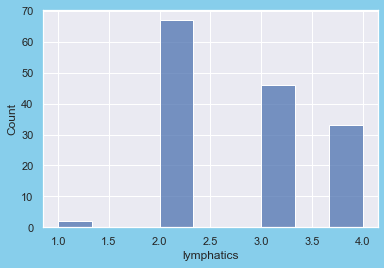

In [74]:
#data distribution of the target variable
sns.histplot(df.iloc[:,1])

 Preparing our Data for Modelling

In [75]:
#Train-Test Split
#we should separate the target variable from the predictors then split the data into train and test sets.
X=df.drop(columns=['class_levels'],axis=1)
y=df['class_levels']
print('shape of X(predictors): {}\nshape of y(target): {}'.format(X.shape,y.shape))

shape of X(predictors): (148, 18)
shape of y(target): (148,)


In [76]:
#split the dataset into training dataset and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#checking the shape of the dataset to make sure all in order
print('shape of X_train: {} \t shape of X_test: {} \nshape of y_train: {} \t shape of y_test: {}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

shape of X_train: (103, 18) 	 shape of X_test: (45, 18) 
shape of y_train: (103,) 	 shape of y_test: (45,)


Building a K-Nearest Neighbors and Decision Tree ML models without doing sampling(oversampling)

K-Nearest Neighbors Classifier

In [77]:
#Build/Train the KNN model
knn_model=KNeighborsClassifier()   # Instantiate the model
knn_model.fit(X_train,y_train)      # Fit the model to the training set
print('performance of the training model: ',knn_model.score(X_train,y_train))

knn_ypred=knn_model.predict(X_test)  # Predict on the test set
print('performance of the testing model:',metrics.accuracy_score(y_test,knn_ypred))  # Get accuracy

performance of the training model:  0.8640776699029126
performance of the testing model: 0.6222222222222222


Decision Tree Classifier

In [78]:
### Instantiate the model
dtc_model=DecisionTreeClassifier()
### Fit the model to the training set
dtc_model.fit(X_train,y_train)
print('performance of the training model: ',dtc_model.score(X_train,y_train))

dtc_ypred=dtc_model.predict(X_test)### Predict on the test set
print('performance of the testing model:',metrics.accuracy_score(y_test,dtc_ypred))

performance of the training model:  1.0
performance of the testing model: 0.6666666666666666


can conclude that, there is a overfitting problem in our model due to imbalanced data

We have a Imbalanced data!, so accuracy is poor. So we will do Data Improvement using Upsample/oversample,

Upsample / Oversample

In [79]:
##!pip install imbalanced-learn
#We've seen above that the dataset is imbalanced, we will upsample/oversample minority classes so that its count is same as the major classes
#To do this, we should first merge the x_train and y_train. Shown below is the value counts of target variable before upsampling.

from imblearn.over_sampling import SMOTE  #for oversampling
# from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import NearMiss  #for udersampling

over_sample=SMOTE(k_neighbors=1)
X,y=over_sample.fit_resample(X,y)

#split the dataset into training dataset and testing dataset
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X,y,test_size=0.3,random_state=1)

#checking the shape of the dataset to make sure all in order
print('shape of X_train: {} \t shape of X_test: {} \nshape of y_train: {} \t shape of y_test: {}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

shape of X_train: (103, 18) 	 shape of X_test: (45, 18) 
shape of y_train: (103,) 	 shape of y_test: (45,)


Building a K-Nearest Neighbors and Decision Tree classifier ML models under oversampling sampling method

K-Nearest Neighbors Classifier

In [80]:
## Using Upsampled training set
knn_model_os=KNeighborsClassifier()
knn_model_os.fit(X_train_os,y_train_os)
print('performance of the training model: ',knn_model.score(X_train_os,y_train_os))

knn_ypred_os=knn_model_os.predict(X_test_os)
print('performance of the testing model:',metrics.accuracy_score(y_test_os,knn_ypred_os))

performance of the training model:  0.415929203539823
performance of the testing model: 0.8673469387755102


Decision Tree classifier

In [81]:
dtc_model_os=DecisionTreeClassifier()
dtc_model_os.fit(X_train_os,y_train_os)
print('performance of the training model: ',dtc_model.score(X_train_os,y_train_os))

dtc_ypred_os=dtc_model_os.predict(X_test_os) ### Predict on the test set
print('performance of the testing model:',metrics.accuracy_score(y_test_os,dtc_ypred_os))

#dtc_ypred_os=dtc_model_os.predict(X_test_os) ### Predict on the test set

performance of the training model:  0.6238938053097345
performance of the testing model: 0.8979591836734694


The predict method is used to predict the actual class while predict_proba method can be used to infer the class probabilities (i.e. the probability that a particular data point falls into the underlying classes).

Performance metrics to evaluate our model with and without Sampling method

In [82]:
### Get performance metrics
knn_score = metrics.accuracy_score(y_test, knn_ypred) * 100
knn_score_up = metrics.accuracy_score(y_test_os, knn_ypred_os) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report {}".format(metrics.classification_report(y_test, knn_ypred)))
print("Accuracy score:", knn_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report {}".format(metrics.classification_report(y_test_os, knn_ypred_os)))
print("Accuracy score:", knn_score_up)

----- Regular Training Set Used -----
Classification report               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.74      0.71      0.73        28
           3       0.44      0.57      0.50        14
           4       0.00      0.00      0.00         2

    accuracy                           0.62        45
   macro avg       0.30      0.32      0.31        45
weighted avg       0.60      0.62      0.61        45

Accuracy score: 62.22222222222222

----- Upsampled Training Set Used -----
Classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.74      0.64      0.68        22
           3       0.73      0.81      0.77        27
           4       1.00      1.00      1.00        24

    accuracy                           0.87        98
   macro avg       0.87      0.86      0.86        98
weighted avg       0.87     

In [83]:
### Plot confusion matrix
# sns.heatmap(metrics.confusion_matrix(y_test,knn_ypred),annot=True)
# plt.show()
# sns.heatmap(metrics.confusion_matrix(y_test_os,knn_ypred_os),annot=True)
# plt.show()
### Perform cross-validation then get the mean
knn_cv = np.mean(cross_val_score(knn_model, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", knn_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 89.22348484848484


In [84]:
### Get performance metrics
dtc_score = metrics.accuracy_score(y_test, dtc_ypred) * 100
dtc_score_up = metrics.accuracy_score(y_test_os, dtc_ypred_os) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report {}".format(metrics.classification_report(y_test, dtc_ypred)))
print("Accuracy score:", dtc_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report {}".format(metrics.classification_report(y_test_os, dtc_ypred_os)))
print("Accuracy score:", dtc_score_up)

----- Regular Training Set Used -----
Classification report               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.71      0.74        28
           3       0.53      0.71      0.61        14
           4       0.00      0.00      0.00         2

    accuracy                           0.67        45
   macro avg       0.32      0.36      0.34        45
weighted avg       0.64      0.67      0.65        45

Accuracy score: 66.66666666666666

----- Upsampled Training Set Used -----
Classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.77      0.77      0.77        22
           3       0.81      0.81      0.81        27
           4       1.00      1.00      1.00        24

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90     

as in KNN, the accuracy of dtree_os is way better than of the dtree.

In [85]:
### Perform cross-validation then get the mean
dtree_cv = np.mean(cross_val_score(dtc_model, X, y, cv=10) * 100)
print("Cross-Validation score for DTree (10 folds):", knn_cv)

Cross-Validation score for DTree (10 folds): 89.22348484848484


Upsampling / Oversampling data improves the model performance, especially on cases like this where it is hard to gather data.

The Decision Tree fit on upsampled data has the highest accuracy score. But this does not mean that this is the overall best model for this dataset.

It still depends on the use case whether which models and metrics to consider.

For example, if we want to focus on classifying metastases (class == 2), it may be better to use Random forest than Decision Tree because the Random Forest model fit on upsampled data classifies metastases better than all the other models tried here.

Most of the data out there are imbalanced, and oversampling is just one of the many techniques to have a work around on this problem.

### Building our Artificial Neural Network model Without using Sampling method

In [86]:
#importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.layers import ELU, ReLU, LeakyReLU, PReLU
#tensorflow keras neural networks
#!pip install tensorflow
#!pip install keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [87]:
# #Initializing the ANN
model=Sequential()
#adding the input layer and first hidden layer
model.add(Dense(26, activation='relu',input_dim=X_train.shape[1]))#input_shape,kernel_initializer='glorot_uniform'
# #adding the second hidden layer
model.add(Dense(15, activation ='relu'))# kernel_initializer='glorot_uniform'))
# #adding the output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_492 (Dense)           (None, 26)                494       
                                                                 
 dense_493 (Dense)           (None, 15)                405       
                                                                 
 dense_494 (Dense)           (None, 1)                 16        
                                                                 
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(18,)),
#     keras.layers.Dense(4, activation=tf.nn.relu),
# 	keras.layers.Dense(4, activation=tf.nn.relu),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=34, batch_size=1)# validation_data=(X_val, y_val))

# #compiling the ANN
# model.compile(optimizer='adam',loss='CategoricalCrossentropy', metrics=['accuracy'])

# #fitting the ANN to the training data
# classifier=model.fit(X_train,y_train,epochs=500)#batch_size=32

Epoch 1/34
226/226 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 2/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 3/34
226/226 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 4/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 5/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 6/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 7/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 8/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 9/34
226/226 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 10/34
226/226 [==============================] - 0s 2ms/st

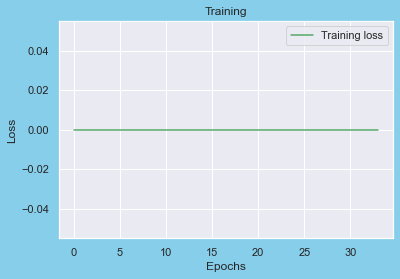

In [89]:
#loss_train = history.history['loss']
#loss_val = history.history['val loss']
epochs = range(1,35)
plt.plot(history.history['loss'], 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

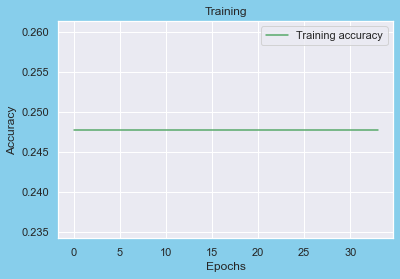

<Figure size 432x288 with 0 Axes>

In [90]:
#loss_train = history.history['accuracy']
#loss_val = history.history['val_accuracy']
epochs = range(1,35)
plt.plot(history.history['accuracy'], 'g', label='Training accuracy')
#plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.savefig('accuracy')

In [91]:
#evaluate the model
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2551


[0.0, 0.2551020383834839]

In [92]:
#predicting the value
y_pred_ann=model.predict(X_test)
print(y_pred_ann)
y_ann=np.round(y_pred_ann)

4/4 [==============================] - 0s 3ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

In [93]:
y_roc=model.predict(X_test).ravel()
print()
print(metrics.roc_curve(y_test,y_roc,pos_label=1))
print()
fprate,tprate,thresholds=metrics.roc_curve(y_test,y_roc,pos_label=1)
print(fprate,tprate,thresholds)
print()
auc_keras=metrics.auc(fprate,tprate)
auc_keras

4/4 [==============================] - 0s 3ms/step

(array([0., 1.]), array([0., 1.]), array([2., 1.], dtype=float32))

[0. 1.] [0. 1.] [2. 1.]



0.5

In [94]:
print(metrics.classification_report(y_test,y_ann))

              precision    recall  f1-score   support

           1       0.26      1.00      0.41        25
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        24

    accuracy                           0.26        98
   macro avg       0.06      0.25      0.10        98
weighted avg       0.07      0.26      0.10        98



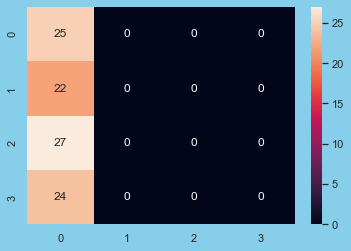

In [95]:
metrics.confusion_matrix(y_test,y_ann)

sns.heatmap(metrics.confusion_matrix(y_test,y_ann),annot=True)#cmap='Blues')

confusion_mat=pd.DataFrame(metrics.confusion_matrix(y_test,y_ann),columns=['F1','F2','F3','F4'],index=['a1','a2','a3','a4'])

### Building our Artificial Neural Network model with Sampling method, which has balanced data in our target variable

In [96]:
#Initializing the ANN
model_os=Sequential()
#adding the input layer and first hidden layer
model_os.add(Dense(26, activation='relu',input_dim=X_train_os.shape[1]))#input_shape
#adding the second hidden layer
model_os.add(Dense(15, activation ='relu',))
#adding the output layer
model_os.add(Dense(1, activation='sigmoid'))
model_os.summary()

Model: "sequential_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_495 (Dense)           (None, 26)                494       
                                                                 
 dense_496 (Dense)           (None, 15)                405       
                                                                 
 dense_497 (Dense)           (None, 1)                 16        
                                                                 
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________


In [97]:
#compiling the ANN
model_os.compile(optimizer='adam',loss='CategoricalCrossentropy', metrics=['accuracy'])

#fitting the ANN to the training data
classifier_os=model_os.fit(X_train_os,y_train_os,batch_size=32,epochs=30)

Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2478
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2478

In [98]:
#evaluate the model
model_os.evaluate(X_test_os,y_test_os)

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2551


[0.0, 0.2551020383834839]

In [99]:
#predicting the value
y_ann_os=model_os.predict(X_test_os)
y_ann_os
y_pred_os=np.round(y_ann_os)

4/4 [==============================] - 0s 2ms/step


In [100]:
y_roc_os=model_os.predict(X_test_os).ravel()
print()
print(metrics.roc_curve(y_test_os,y_roc_os,pos_label=1))
print()
fpr,tpr,thresh=metrics.roc_curve(y_test_os,y_roc_os,pos_label=1)
print(fpr,tpr,thresh)
auc_keras=metrics.auc(fpr,tpr)
auc_keras

4/4 [==============================] - 0s 2ms/step

(array([0., 1.]), array([0., 1.]), array([2., 1.], dtype=float32))

[0. 1.] [0. 1.] [2. 1.]


0.5

In [101]:
print(metrics.classification_report(y_test_os,y_pred_os))

              precision    recall  f1-score   support

           1       0.26      1.00      0.41        25
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        24

    accuracy                           0.26        98
   macro avg       0.06      0.25      0.10        98
weighted avg       0.07      0.26      0.10        98



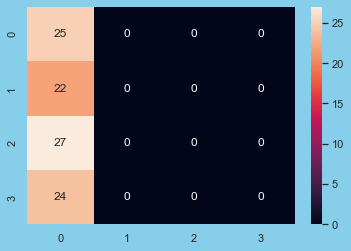

In [102]:
#confusion matrix performance using oversampling method
metrics.confusion_matrix(y_test_os,y_pred_os)

sns.heatmap(metrics.confusion_matrix(y_test_os,y_pred_os),annot=True)#cmap='Blues')

confusion_mat=pd.DataFrame(metrics.confusion_matrix(y_test_os,y_pred_os),columns=['F1','F2','F3','F4'],index=['a1','a2','a3','a4'])

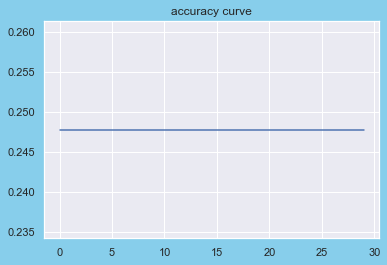

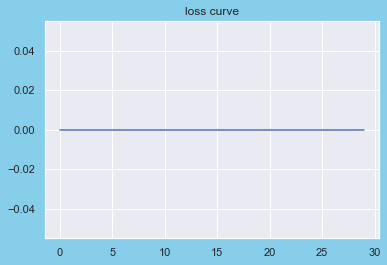

In [103]:
#classifier.history.keys()
plt.plot(classifier_os.history['accuracy'], label=['train accuracy'])
plt.title('accuracy curve')
plt.show()
plt.plot(classifier_os.history['loss'],label=['train loss'])
plt.title('loss curve')
plt.show()

### Hyperparameter Tuning our ML models (oversampling method) using GridSerachCV

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Considering Decision Tree Classifier and KNN Machine Learning models to use GridSearchCV. So created an object dec_tree.

Using Pipeline for GridSearchCV

Pipeline will helps us by passing modules one by one through GridSearchCV for which to get the best parameters. So making an object pipe to create a pipeline for all the objects.

In [105]:
dec_tree=DecisionTreeClassifier()

pipe = Pipeline([('dec_tree', dec_tree)])

#DecisionTreeClassifier requires two parameters 'criterion' and 'max_depth' to be optimised by GridSearchCV.
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

#creating a dictionary to set all the parameters options for objects.
parameters = [{'dec_tree__criterion':criterion,
                'dec_tree__max_depth':max_depth}]

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters,cv=5, n_jobs=-1)
clf_GS.fit(X_train_os, y_train_os)

# give the values of hyperparameters as a result.
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])
print(clf_GS.best_score_)

Best Criterion: entropy
Best max_depth: 10
DecisionTreeClassifier(criterion='entropy', max_depth=10)
0.9160386473429952


In [106]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train_os,y_train_os)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print(best_model.best_score_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3
0.9290513833992096


### Hyper parameter Tuning the Deep Learning model(sampling) using GridsearchCv

In [107]:
from keras.wrappers.scikit_learn import KerasClassifier #for classification problem
#from keras.wrappers.scikit_learn import KerasRegressor

#model_keras=KerasClassifier()
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
        activation = 'relu', input_dim = 18))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
        activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', 
        activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 
        'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
          'epochs': [100, 500],
          'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 0.6878 - accuracy: 0.2562
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.2562
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.2562
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.2562
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.2562
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5147 - accuracy: 0.2562
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.2562
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.2562
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.2562
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: -0.0825 - accuracy: 0.2562
Epoch 11/100
9/9 [==========

In [108]:
# from keras.wrappers.scikit_learn import KerasClassifier #for classification problem
# #from keras.wrappers.scikit_learn import KerasRegressor
# model_keras=KerasClassifier()
# param_grid=dict(batch_size=batch_size,optimizer=optimizer)
# grid=GridSearchCV(estimator=model_keras,param_grid=param_grid)
# grid_result=grid.fit(X_train_os,y_train_os)

#Print The value of best Hyperparameters
print('Best batch size mean:', grid_search.cv_results_['mean_test_score'])
print('Best batch size std:', best_model.cv_results_['std_test_score'])#best:params
print('Best opt mean:', grid_search.cv_results_['mean_test_score'])
print('Best opt std:', best_model.cv_results_['std_test_score'])#best:params

Best batch size mean: [0.26146245 0.26146245 0.26146245 0.26146245 0.26146245 0.26146245
 0.26146245 0.26146245]
Best batch size std: [0.03709997 0.04289994 0.04103635 ... 0.05456264 0.06281384 0.05320722]
Best opt mean: [0.26146245 0.26146245 0.26146245 0.26146245 0.26146245 0.26146245
 0.26146245 0.26146245]
Best opt std: [0.03709997 0.04289994 0.04103635 ... 0.05456264 0.06281384 0.05320722]


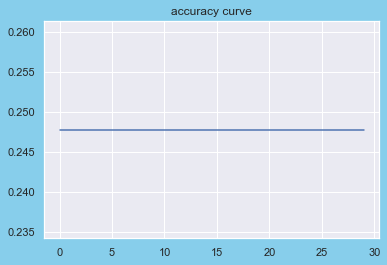

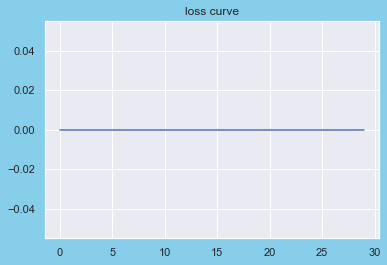

In [109]:
#classifier.history.keys()
# import matplotlib.pyplot as plt
plt.plot(classifier_os.history['accuracy'], label=['train accuracy'])
plt.title('accuracy curve')
plt.show()
plt.plot(classifier_os.history['loss'],label=['train loss'])
plt.title('loss curve')
plt.show()

In [110]:
#storing the data in pickle file
with open(r'C:\Users\Dell\Desktop\Lymphography Dataset\model\Lymphography_DL_Model.pkl','wb') as pickle_file:
    pickle.dump(grid_search,pickle_file)

INFO:tensorflow:Assets written to: ram://d7c78510-b50e-4aa4-ae4c-c25256021c84/assets
